!["./Screenshot 2025-11-03 145507.jpg"](Screenshot%202025-11-03%20145507.jpg)

!["./q1.jpg"](q1.jpg)

$e_s = <S_x,S_y>$

$e_t = <T_x,T_y>$

$e_s•q = \frac{<S_x,S_y>•<q_x,q_y>}{||<S_x,S_y>||^2} *e_s = \frac{(S_x*q_x+S_y*q_y)<S_x,S_y>}{1} $

$e_t•q = \frac{<T_x,T_y>•<q_x,q_y>}{||<q_x,q_y>||^2} *e_t = \frac{(T_x*q_x+T_y*q_y)<T_x,T_y>}{1}$

q in the space [S,T] is $[(S_x*q_x+S_y*q_y)<S_x,S_y>, (T_x*q_x+T_y*q_y)<T_x,T_y>]$



In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\brean\AppData\Local\Temp\ipykernel_5476\1536809154.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd




mean center

In [5]:
def mean_centering(df):
    for variable in df.columns:
        df[variable] = df[variable] - np.mean(df[variable])



Covariance matrix

$cov(x,y) = \frac{ \sum (x_i-x̄)(y_i-ȳ) }{n-1}$

$var(x) = \frac{ \sum (x_i-x̄)^2 }{n-1}$

In [6]:
df = pd.read_csv("data/Homework_2_dataset_prob3.csv")
mean_centering(df)

matrix = df.to_numpy()



In [154]:
class MyPCA:

    """Calculate the PCA for mean centered data"""
    def __init__(self, x):
        self.x = x
        self.covariance_matrix: np.array = None
        self.variance: np.array = None
        self.principal_components: np.array = None
        self.projections: np.array = None

    def covariance(self):
        matrix_copy = self.x.copy()
        variable_means = [np.mean(column) for column in matrix_copy] ## should be near 0 since we mean centered
        
        for index, mean in enumerate(variable_means):
            matrix_copy[index] = matrix_copy[index] - mean
        cov = []

        for column in matrix_copy:
            column_list = []
            for column2 in matrix_copy:
                column_list.append( round( sum(column * column2)/ (len(column) - 1), 8 )  )
            cov.append(column_list)

        self.covariance_matrix = cov

    def compute_eigens(self):
        """1. Eigenvalue decomposition
           2. Ensures the eigenvalues and eigenvectors are ordered."""
        if not self.covariance_matrix:
            self.covariance()
        vals, vec = np.linalg.eig(self.covariance_matrix)
        # sorted_vals = []
        # max = vals[0]
        # vals = [6,17,18,18,100,4,3,0]
        index = vals.argsort()[::-1]
        self.variance = vals[index]
        self.principal_components = (vec[:, index]).T
    
    def percent_variance_explained(self):
        if self.variance is None:
            self.compute_eigens()

        return self.variance/sum(self.variance) * 100
    
    def projection(self):
        """Compute Y = X*P aka project the principal components onto X"""
        if self.variance is None:
            self.compute_eigens()

        self.projections = np.matmul(self.x.T, self.principal_components)
    
    def scree_plot(self):
        if self.variance is None:
            raise Exception("Do eigendecomposition first.")
        variance = self.percent_variance_explained()
        x_axis = np.array(["PC "+str(i+1) for i in range(len(variance))])   
        
        plt.plot(x_axis, variance, linestyle = "-", marker = "o", label = "PC")
        plt.legend()
        plt.show()

    def loading_plot(self):
        if self.principal_components is None or self.projections is None:
            raise Exception("Do eigendecomposition first and compute the projections.")
        # Set figsize and other layout parameters
        plt.figure(figsize=(8, 8))
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')

        # Add variable labels to the plot
        for i, feature in enumerate(df.columns):

            # Add the name of the variable near the arrow
            plt.annotate(feature, # variable name
                        (self.principal_components.T[i, 0],
                        self.principal_components.T[i, 1]),
                        color='red')
            
            # Add an arrow representing the variable on the new axis
            plt.arrow(0,0,
                    self.principal_components.T[i, 0],
                    self.principal_components.T[i, 1],
                    color='black',
                    alpha=0.7, 
                    width=0.01,
                    )

        # Fix x-axis between -1 and 1 is important for better visualization
        plt.xlim(-1,1)
        plt.ylim(-1,1)

        # Add grid in the background
        plt.grid(True)

        # Display the chart
        plt.show()
        

    def scores_plot(self):
        if self.projections is None:
            raise("Compute projections first.")
        
        projections = self.projections.T
        plt.scatter(projections[0], projections[1])
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.show()

[[-0.67510539 -0.7377213 ]
 [-0.7377213   0.67510539]]


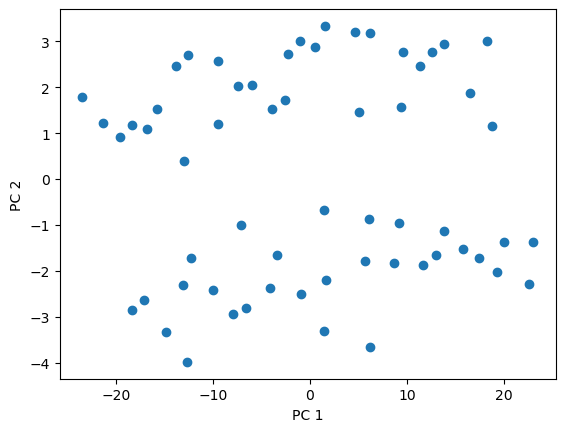

In [155]:
pca_matrix = MyPCA(x = matrix.T)

pca_matrix.compute_eigens()
pca_matrix.projection()
# pca_matrix.percent_variance_explained()

# print(pca_matrix.scree_plot())



# print(np.transpose(pca_matrix.principal_components))
print(pca_matrix.principal_components)
# print(pca_matrix.covariance_matrix)
# pca_matrix.loading_plot()

# [[ 0.67510539,  0.7377213 ],
#  [ 0.7377213 , -0.67510539]]
pca_matrix.scores_plot()

In [30]:
def covariance(matrix):
    matrix_copy = matrix.copy()
    variable_means = [np.mean(column) for column in matrix] ## should be near 0 since we mean centered

    for index, mean in enumerate(variable_means):
        matrix_copy[index] = matrix_copy[index] - mean
    cov = []

    for column in matrix_copy:
        column_list = []
        for column2 in matrix_copy:
            column_list.append( round( sum(column * column2)/ (len(column) - 1), 8 )  )
        cov.append(column_list)

    return cov





In [35]:
def compute_eigens(covariance_matrix):
    """Ensures the eigenvalues and eigenvectors are ordered."""
    vals, vec = np.linalg.eig(covariance_matrix)
    sorted_vals = []
    # max = vals[0]
    # vals = [6,17,18,18,100,4,3,0]
    index = vals.argsort()[::-1]
    return vals[index], vec[:, index]
    
    
        

In [36]:
def percent_variance_explained(covariance_matrix):
    vals, vec = compute_eigens(covariance_matrix)

    return vals/sum(vals) * 100
    

In [63]:
my_cov = covariance(matrix.T)

vals, vec = compute_eigens(my_cov)

percent_variance_explained(my_cov)

array([96.91556417,  3.08443583])

In [65]:
np.matmul(matrix, vec)

array([[ -1.37554593,  22.98125567],
       [ -2.28970193,  22.49894927],
       [ -1.36361068,  20.005713  ],
       [ -2.02791987,  19.25038654],
       [ -1.72371377,  17.43671516],
       [ -1.52169118,  15.7347048 ],
       [ -1.11893815,  13.81334629],
       [ -1.65919662,  12.92246342],
       [ -1.87416596,  11.67612091],
       [ -0.96509075,   9.20147893],
       [ -1.82859835,   8.66382649],
       [ -0.85769827,   6.12162538],
       [ -1.78359786,   5.65215179],
       [ -3.66058307,   6.22197684],
       [ -0.67381093,   1.47693189],
       [ -2.19661835,   1.65972922],
       [ -3.30952212,   1.39460442],
       [ -2.4967838 ,  -0.97476546],
       [ -1.66093746,  -3.36938661],
       [ -2.36000994,  -4.08672549],
       [ -0.99853296,  -7.05572945],
       [ -2.81240164,  -6.55487496],
       [ -2.9401047 ,  -7.89657768],
       [ -2.41289772,  -9.95393323],
       [ -1.70841075, -12.20501147],
       [ -2.30719345, -13.03194198],
       [ -3.97833325, -12.68705447],
 

In [64]:
np_cov = np.cov(matrix.T)

vals, vec = np.linalg.eig(np_cov)

# np_cov

vec


array([[-0.7377213 , -0.67510539],
       [ 0.67510539, -0.7377213 ]])

In [142]:
from sklearn.decomposition import PCA

pca = PCA().fit(matrix)
pca.explained_variance_
pca.components_ #* np.sqrt(pca.explained_variance_ratio_)
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# pca = PCA(n_components=2)

# pca.fit(X)
np.linalg.eig(pca.get_covariance())[1].T

# array([[ 0.67510539,  0.7377213 ],
#        [ 0.7377213 , -0.67510539]])

array([[-0.7377213 ,  0.67510539],
       [-0.67510539, -0.7377213 ]])